In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pysam
import pandas as pd
import numpy as np
import os
import collections
import ast
from pygenomeviz import GenomeViz

# Import DataFrames

In [2]:
drbList = []
for file in os.listdir('/home/mark/Desktop/HLA/DRB/DataFrames/full/'):
    print(file)
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/DRB/DataFrames/full/'+str(file))
    for row in tempDF.index:
        drbList.append([x for x in tempDF.loc[row]])

NA20847.hap2.csv
HG00358.hap2.csv
HG02953.hap2.csv
HG02554.hap2.csv
HG01114.hap2.csv
HG02059.hap1.csv
HG00514.hap1.csv
HG01596.hap1.csv
NA18939.hap2.csv
NA19129.hap1.csv
NA19331.hap1.csv
HG03065.hap2.csv
NA19705.hap1.csv
HG03456.hap2.csv
HG00358.hap1.csv
NA19317.hap1.csv
HG03807.hap1.csv
NA19240.hap1.csv
HG03371.hap2.csv
HG01573.hap1.csv
HG02769.hap1.csv
NA18989.hap1.csv
HG00096.hap1.csv
HG01596.hap2.csv
HG00512.hap2.csv
HG04036.hap1.csv
NA20509.hap2.csv
NA12329.hap1.csv
HG02587.hap1.csv
NA18989.hap2.csv
NA19239.hap1.csv
HG03732.hap2.csv
hg38.hap6.csv
HG01114.hap1.csv
HG04217.hap1.csv
NA24385.hap1.csv
HG02769.hap2.csv
HG02011.hap1.csv
HG04217.hap2.csv
chm13.hap1.csv
NA19384.hap2.csv
HG03248.hap1.csv
NA19036.hap2.csv
HG00864.hap1.csv
HG03520.hap1.csv
NA19836.hap1.csv
HG03009.hap1.csv
HG00514.hap2.csv
HG02059.hap2.csv
NA19650.hap2.csv
NA20355.hap1.csv
NA20847.hap1.csv
HG01352.hap1.csv
HG02106.hap1.csv
HG02666.hap2.csv
HG02953.hap1.csv
HG03683.hap2.csv
NA19347.hap2.csv
NA18534.hap1.csv
HG

In [3]:
DRB_DF1 = pd.DataFrame(data=drbList)

In [4]:
DRB_DF1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NA20847.hap2_4318694_MIRb,42.0,33.3,6.1,0.0,NA20847.hap2,4318694,4318891,(1781957),+,MIRb,SINE/MIR,10,219.0,(49),7116.0,4318206,488,NaN,NaN
1,NA20847.hap2_4319056_AluSc,327.0,8.8,0.3,0.0,NA20847.hap2,4319056,4319352,(1781496),+,AluSc,SINE/Alu,1,298.0,(11),7117.0,4318206,850,NaN,NaN
2,NA20847.hap2_4319558_AluY,343.0,5.8,0.0,2.3,NA20847.hap2,4319558,4319870,(1780978),+,AluY,SINE/Alu,1,306.0,(5),7118.0,4318206,1352,NaN,NaN
3,NA20847.hap2_4319880_L1MC2,668.0,18.3,4.0,0.7,NA20847.hap2,4319880,4320719,(1780129),C,L1MC2,LINE/L1,(10),6334.0,5467,7119.0,4318206,1674,NaN,NaN
4,NA20847.hap2_4320739_L1MD2,439.0,21.0,11.8,2.7,NA20847.hap2,4320739,4321444,(1779404),C,L1MD2,LINE/L1,(15),6344.0,5577,7120.0,4318206,2533,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48516,NA12329.hap2_4585462_AluSg7,217.0,8.7,19.5,0.7,NA12329.hap2,4585462,4585702,(1533005),+,AluSg7,SINE/Alu,12,297.0,(12),7539.0,4309952,275510,NaN,NaN
48517,NA12329.hap2_4586217_MIR,43.0,32.0,1.0,0.0,NA12329.hap2,4586217,4586313,(1532394),+,MIR,SINE/MIR,58,155.0,(107),7540.0,4309952,276265,NaN,NaN
48518,NA12329.hap2_4586402_MER90a,69.0,21.1,2.3,0.0,NA12329.hap2,4586402,4586529,(1532178),C,MER90a,LTR/ERV1,(2),612.0,482,7541.0,4309952,276450,NaN,NaN
48519,NA12329.hap2_4586530_MLT2C1,225.0,23.4,4.5,6.1,NA12329.hap2,4586530,4586911,(1531796),C,MLT2C1,LTR/ERVL,(18),379.0,4,7542.0,4309952,276578,NaN,NaN


In [5]:
import ast
goodRows =[]
for row in DRB_DF1.index:
    if 'DRB' in str(DRB_DF1.at[row,18]):
        goodRows.append(row)
        DRB_DF1.at[row,11] = ast.literal_eval(DRB_DF1.at[row,18]).strip()
        if '+' in str(DRB_DF1.at[row,9]):
            DRB_DF1.at[row,10] = str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"->_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())
        else:
            DRB_DF1.at[row,10] = "<-"+str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())

    else:
        if DRB_DF1.at[row,2]<=50.0:
            goodRows.append(row)
        else:
            continue
DRB_DF2=DRB_DF1.loc[goodRows].copy()

In [6]:
pDF1 = pd.read_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM_ReWork2024-03-27-2024.csv').drop(columns=['Unnamed: 0'])
for row in pDF1.index:
    if pDF1.at[row,'8']=='HLA-DRB6-202_lncR_EXON_6':
        pDF1.at[row,'14']='Gene'
    else:
        continue
pDF  = pDF1[pDF1['14']=='Gene'].copy()

In [7]:
mydrbList=[]
for row in DRB_DF2.index:
    mydrbList.append([x for x in DRB_DF2.loc[row]])
    
for row in pDF.index:
    row0 = 'placeholder'
    row1 = 'placeholder1'
    row2 = pDF.at[row,'1']
    row3 = pDF.at[row,'2']
    row4 = pDF.at[row,'3']
    row5 = pDF.at[row,'4']
    row6 = pDF.at[row,'5']
    row7 = pDF.at[row,'6']
    row8 = 'placeholder'
    if pDF.at[row,'7'] =='C':
        row9='-'
        row10 = '<-HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])
    else:
        row9='+'
        row10 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])+"->"
        
        
    row11 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])
    row12 = 'placeholder'
    row13 = 'placeholder'
    row14 = 'placeholder'
    row15 = 'placeholder'

    mydrbList.append([row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row14,row14,row14,row14])

In [8]:
DRB_DF = pd.DataFrame(data=mydrbList).sort_values(by=[6,5])
#DRB_DF = pd.DataFrame(data=mydrbList).sort_values(by=[6,5])
DRB_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
39654,hg38.hap8_3668839_MIRb,42.0,33.3,6.1,0.0,hg38.hap8,3668839,3669036,(937352),+,MIRb,SINE/MIR,10,219.0,(49),5719.0,3668351,488,NaN,NaN
39655,hg38.hap8_3669201_AluSc,327.0,8.8,0.3,0.0,hg38.hap8,3669201,3669497,(936891),+,AluSc,SINE/Alu,1,298.0,(11),5720.0,3668351,850,NaN,NaN
39656,hg38.hap8_3669703_AluY,344.0,5.7,0.0,2.3,hg38.hap8,3669703,3670016,(936372),+,AluY,SINE/Alu,1,307.0,(4),5721.0,3668351,1352,NaN,NaN
39657,hg38.hap8_3670019_L1MC2,669.0,18.2,4.0,1.6,hg38.hap8,3670019,3670871,(935517),C,L1MC2,LINE/L1,(5),6339.0,5467,5722.0,3668351,1668,NaN,NaN
39658,hg38.hap8_3670891_L1MD2,440.0,21.0,11.8,2.7,hg38.hap8,3670891,3671596,(934792),C,L1MD2,LINE/L1,(15),6344.0,5577,5723.0,3668351,2540,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,HG03248.hap2_4689492_AluSg7,217.0,8.7,19.5,0.7,HG03248.hap2,4689492,4689732,(1549881),+,AluSg7,SINE/Alu,12,297.0,(12),7697.0,4411787,277705,NaN,NaN
35325,HG03248.hap2_4690247_MIR,43.0,32.0,1.0,0.0,HG03248.hap2,4690247,4690343,(1549270),+,MIR,SINE/MIR,58,155.0,(107),7698.0,4411787,278460,NaN,NaN
35326,HG03248.hap2_4690432_MER90a,69.0,21.1,2.3,0.0,HG03248.hap2,4690432,4690559,(1549054),C,MER90a,LTR/ERV1,(2),612.0,482,7699.0,4411787,278645,NaN,NaN
35327,HG03248.hap2_4690560_MLT2C1,225.0,23.4,4.5,6.1,HG03248.hap2,4690560,4690941,(1548672),C,MLT2C1,LTR/ERVL,(18),379.0,4,7700.0,4411787,278773,NaN,NaN


# Start Visualization

In [9]:
ColorDict = {
 'HLA-DRB2':'cyan',
 'HLA-DRB6':'cyan',
 'HLA-DRB7':'cyan',
 'HLA-DRB8':'cyan',
 'HLA-DRB9':'cyan',  
 'HLA-DRB1':'Magenta',
 'HLA-DRB3':'Magenta',
 'HLA-DRB4':'Magenta',
 'HLA-DRB5':'Magenta',
 'DNA/TcMar-Mariner':'blue',
 'DNA/TcMar-Tigger':'blue',
 'DNA/hAT-Blackjack':'blue',
 'DNA/hAT-Charlie':'blue',
 'DNA/hAT-Tip100':'blue',
 'LINE/CR1':'darkgreen',
 'LINE/L2':'green',
 'LINE/L1':'lime',
 'LTR/ERVK':'orange',
 'LTR/ERV1':'orange',
 'LTR/ERVL':'orange',
 'LTR/ERVL-MaLR':'orange',
 'Low_complexity':'brown',
 'Retroposon/SVA':'yellow',
 'SINE/MIR':'darkred',
 'SINE/Alu':'red',
 'snRNA':'silver',
 'Simple_repeat':"brown",
 
}

In [10]:
DRB_DF['Color']=[ColorDict[x] for x in DRB_DF[11]]

In [11]:
DRB_DF

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Color
39654,hg38.hap8_3668839_MIRb,42.0,33.3,6.1,0.0,hg38.hap8,3668839,3669036,(937352),+,...,SINE/MIR,10,219.0,(49),5719.0,3668351,488,NaN,NaN,darkred
39655,hg38.hap8_3669201_AluSc,327.0,8.8,0.3,0.0,hg38.hap8,3669201,3669497,(936891),+,...,SINE/Alu,1,298.0,(11),5720.0,3668351,850,NaN,NaN,red
39656,hg38.hap8_3669703_AluY,344.0,5.7,0.0,2.3,hg38.hap8,3669703,3670016,(936372),+,...,SINE/Alu,1,307.0,(4),5721.0,3668351,1352,NaN,NaN,red
39657,hg38.hap8_3670019_L1MC2,669.0,18.2,4.0,1.6,hg38.hap8,3670019,3670871,(935517),C,...,LINE/L1,(5),6339.0,5467,5722.0,3668351,1668,NaN,NaN,lime
39658,hg38.hap8_3670891_L1MD2,440.0,21.0,11.8,2.7,hg38.hap8,3670891,3671596,(934792),C,...,LINE/L1,(15),6344.0,5577,5723.0,3668351,2540,NaN,NaN,lime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,HG03248.hap2_4689492_AluSg7,217.0,8.7,19.5,0.7,HG03248.hap2,4689492,4689732,(1549881),+,...,SINE/Alu,12,297.0,(12),7697.0,4411787,277705,NaN,NaN,red
35325,HG03248.hap2_4690247_MIR,43.0,32.0,1.0,0.0,HG03248.hap2,4690247,4690343,(1549270),+,...,SINE/MIR,58,155.0,(107),7698.0,4411787,278460,NaN,NaN,darkred
35326,HG03248.hap2_4690432_MER90a,69.0,21.1,2.3,0.0,HG03248.hap2,4690432,4690559,(1549054),C,...,LTR/ERV1,(2),612.0,482,7699.0,4411787,278645,NaN,NaN,orange
35327,HG03248.hap2_4690560_MLT2C1,225.0,23.4,4.5,6.1,HG03248.hap2,4690560,4690941,(1548672),C,...,LTR/ERVL,(18),379.0,4,7700.0,4411787,278773,NaN,NaN,orange


In [12]:
DRB_DF['Insertion_Distance']='temp'

for sample in set([x for x in DRB_DF[5]]):
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)
    start = int(min(tempDF[6]))
    
    for row in tempDF.index:
        DRB_DF.at[row,'Insertion_Distance']= (int(tempDF.at[row,6])-start)+10

In [13]:
lengths=[]
for row in DRB_DF.index:
    lengths.append((int(DRB_DF.at[row,7]) - int(DRB_DF.at[row,6]))+1)
DRB_DF['Length']= lengths

In [14]:
#for haplotype in set(DRB_DF[5]):
#    tempDF = DRB_DF[DRB_DF[5]==haplotype].copy()
#    tempDF.to_csv('/home/mark/Desktop/HLA/DRB/DataFrames/percent_5/'+str(haplotype)+"_5_percent.csv")

In [14]:
genome_list = {}
for sample in set(DRB_DF[5]):
    
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)

    size = abs(min(tempDF[6])-max(tempDF[7]))

    genome_list[sample]={'name':sample, 'size':size+20, 'cds_list':[]}
    
    for item in tempDF.index:
        start = int(tempDF.at[item,'Insertion_Distance'])
        end = int(tempDF.at[item,'Insertion_Distance'])+int(tempDF.at[item,'Length'])
        if tempDF.at[item,9] == '+':
            strand = 1
        else:
            strand = -1
        genome_list[sample]['cds_list'].append([start, end, strand, str(tempDF.at[item,10]), str(str(tempDF.at[item,'Color']))])

In [15]:
genome_list['HG02666.hap1']

{'name': 'HG02666.hap1',
 'size': 171215,
 'cds_list': [[10, 208, 1, 'MIRb', 'darkred'],
  [372, 670, 1, 'AluSc', 'red'],
  [875, 1189, 1, 'AluY', 'red'],
  [1199, 2039, -1, 'L1MC2', 'lime'],
  [2058, 2762, -1, 'L1MD2', 'lime'],
  [2764, 2865, 1, 'AluJr', 'red'],
  [2866, 3159, -1, 'AluSc', 'red'],
  [3159, 3342, 1, 'AluJr', 'red'],
  [3346, 3812, 1, 'GA-rich', 'brown'],
  [3830, 3859, -1, 'L1PREC2', 'lime'],
  [3863, 4187, -1, 'AluSx', 'red'],
  [4187, 6286, -1, 'L1PREC2', 'lime'],
  [6286, 6640, 1, 'THE1B', 'orange'],
  [6641, 7229, 1, 'THE1B', 'orange'],
  [7232, 7526, -1, 'AluY', 'red'],
  [7526, 8504, 1, 'THE1B', 'orange'],
  [8504, 8861, 1, 'THE1B', 'orange'],
  [8874, 9447, 1, 'L1PA15', 'lime'],
  [9448, 9726, 1, 'AluSc', 'red'],
  [9730, 9876, 1, 'L1PA15', 'lime'],
  [9878, 10043, -1, 'AluSc8', 'red'],
  [10043, 10079, 1, '(T)n', 'brown'],
  [10079, 10197, -1, 'AluSc8', 'red'],
  [10197, 11334, 1, 'L1PA15', 'lime'],
  [11334, 11762, 1, 'MER83', 'orange'],
  [11762, 12367, 1, 'L

In [16]:
import json
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
my_sample_data = js_r('/home/mark/Desktop/HLA/Globus/sample_hap_HLA_Sequence_Dictionary.json')
sampleList = ['chm13.hap1','hg38.hap1']
for x in my_sample_data.keys():
    if 'unassigned' in x:
        continue
    else:
        sampleList.append(str(x.split(".")[0])+".hap"+str(x.split("hap")[1].split(".")[0]))
sampleList2 = sorted(sampleList)
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData.sort_values(by=['population'])
sampleList3 = ['chm13.hap1','hg38.hap1']
for x in metaData.sort_values(by=['population'])['sample']:
    if str(x)+".hap1" in sampleList2:
        sampleList3.append(str(x)+".hap1")
        sampleList3.append(str(x)+".hap2")
    else:
        continue

In [17]:
sampleList3

['chm13.hap1',
 'hg38.hap1',
 'HG01890.hap1',
 'HG01890.hap2',
 'HG02554.hap1',
 'HG02554.hap2',
 'HG02011.hap1',
 'HG02011.hap2',
 'HG02282.hap1',
 'HG02282.hap2',
 'NA19705.hap1',
 'NA19705.hap2',
 'NA19983.hap1',
 'NA19983.hap2',
 'NA20355.hap1',
 'NA20355.hap2',
 'NA19836.hap1',
 'NA19836.hap2',
 'NA24385.hap1',
 'NA24385.hap2',
 'HG03009.hap1',
 'HG03009.hap2',
 'HG03807.hap1',
 'HG03807.hap2',
 'HG00864.hap1',
 'HG00864.hap2',
 'NA12329.hap1',
 'NA12329.hap2',
 'NA18534.hap1',
 'NA18534.hap2',
 'HG00514.hap1',
 'HG00514.hap2',
 'HG00513.hap1',
 'HG00513.hap2',
 'HG00512.hap1',
 'HG00512.hap2',
 'HG01352.hap1',
 'HG01352.hap2',
 'HG01457.hap1',
 'HG01457.hap2',
 'HG01114.hap1',
 'HG01114.hap2',
 'HG03520.hap1',
 'HG03520.hap2',
 'HG03371.hap1',
 'HG03371.hap2',
 'HG02953.hap1',
 'HG02953.hap2',
 'HG00268.hap1',
 'HG00268.hap2',
 'HG00358.hap1',
 'HG00358.hap2',
 'HG00171.hap1',
 'HG00171.hap2',
 'HG00096.hap1',
 'HG00096.hap2',
 'NA20847.hap1',
 'NA20847.hap2',
 'HG02769.hap1',
 '

In [18]:
#OneFromEach
myinterests=['HG02011.hap1','NA19129.hap2','HG02011.hap2','HG02282.hap2','NA20509.hap1', 'chm13.hap1','hg38.hap1']

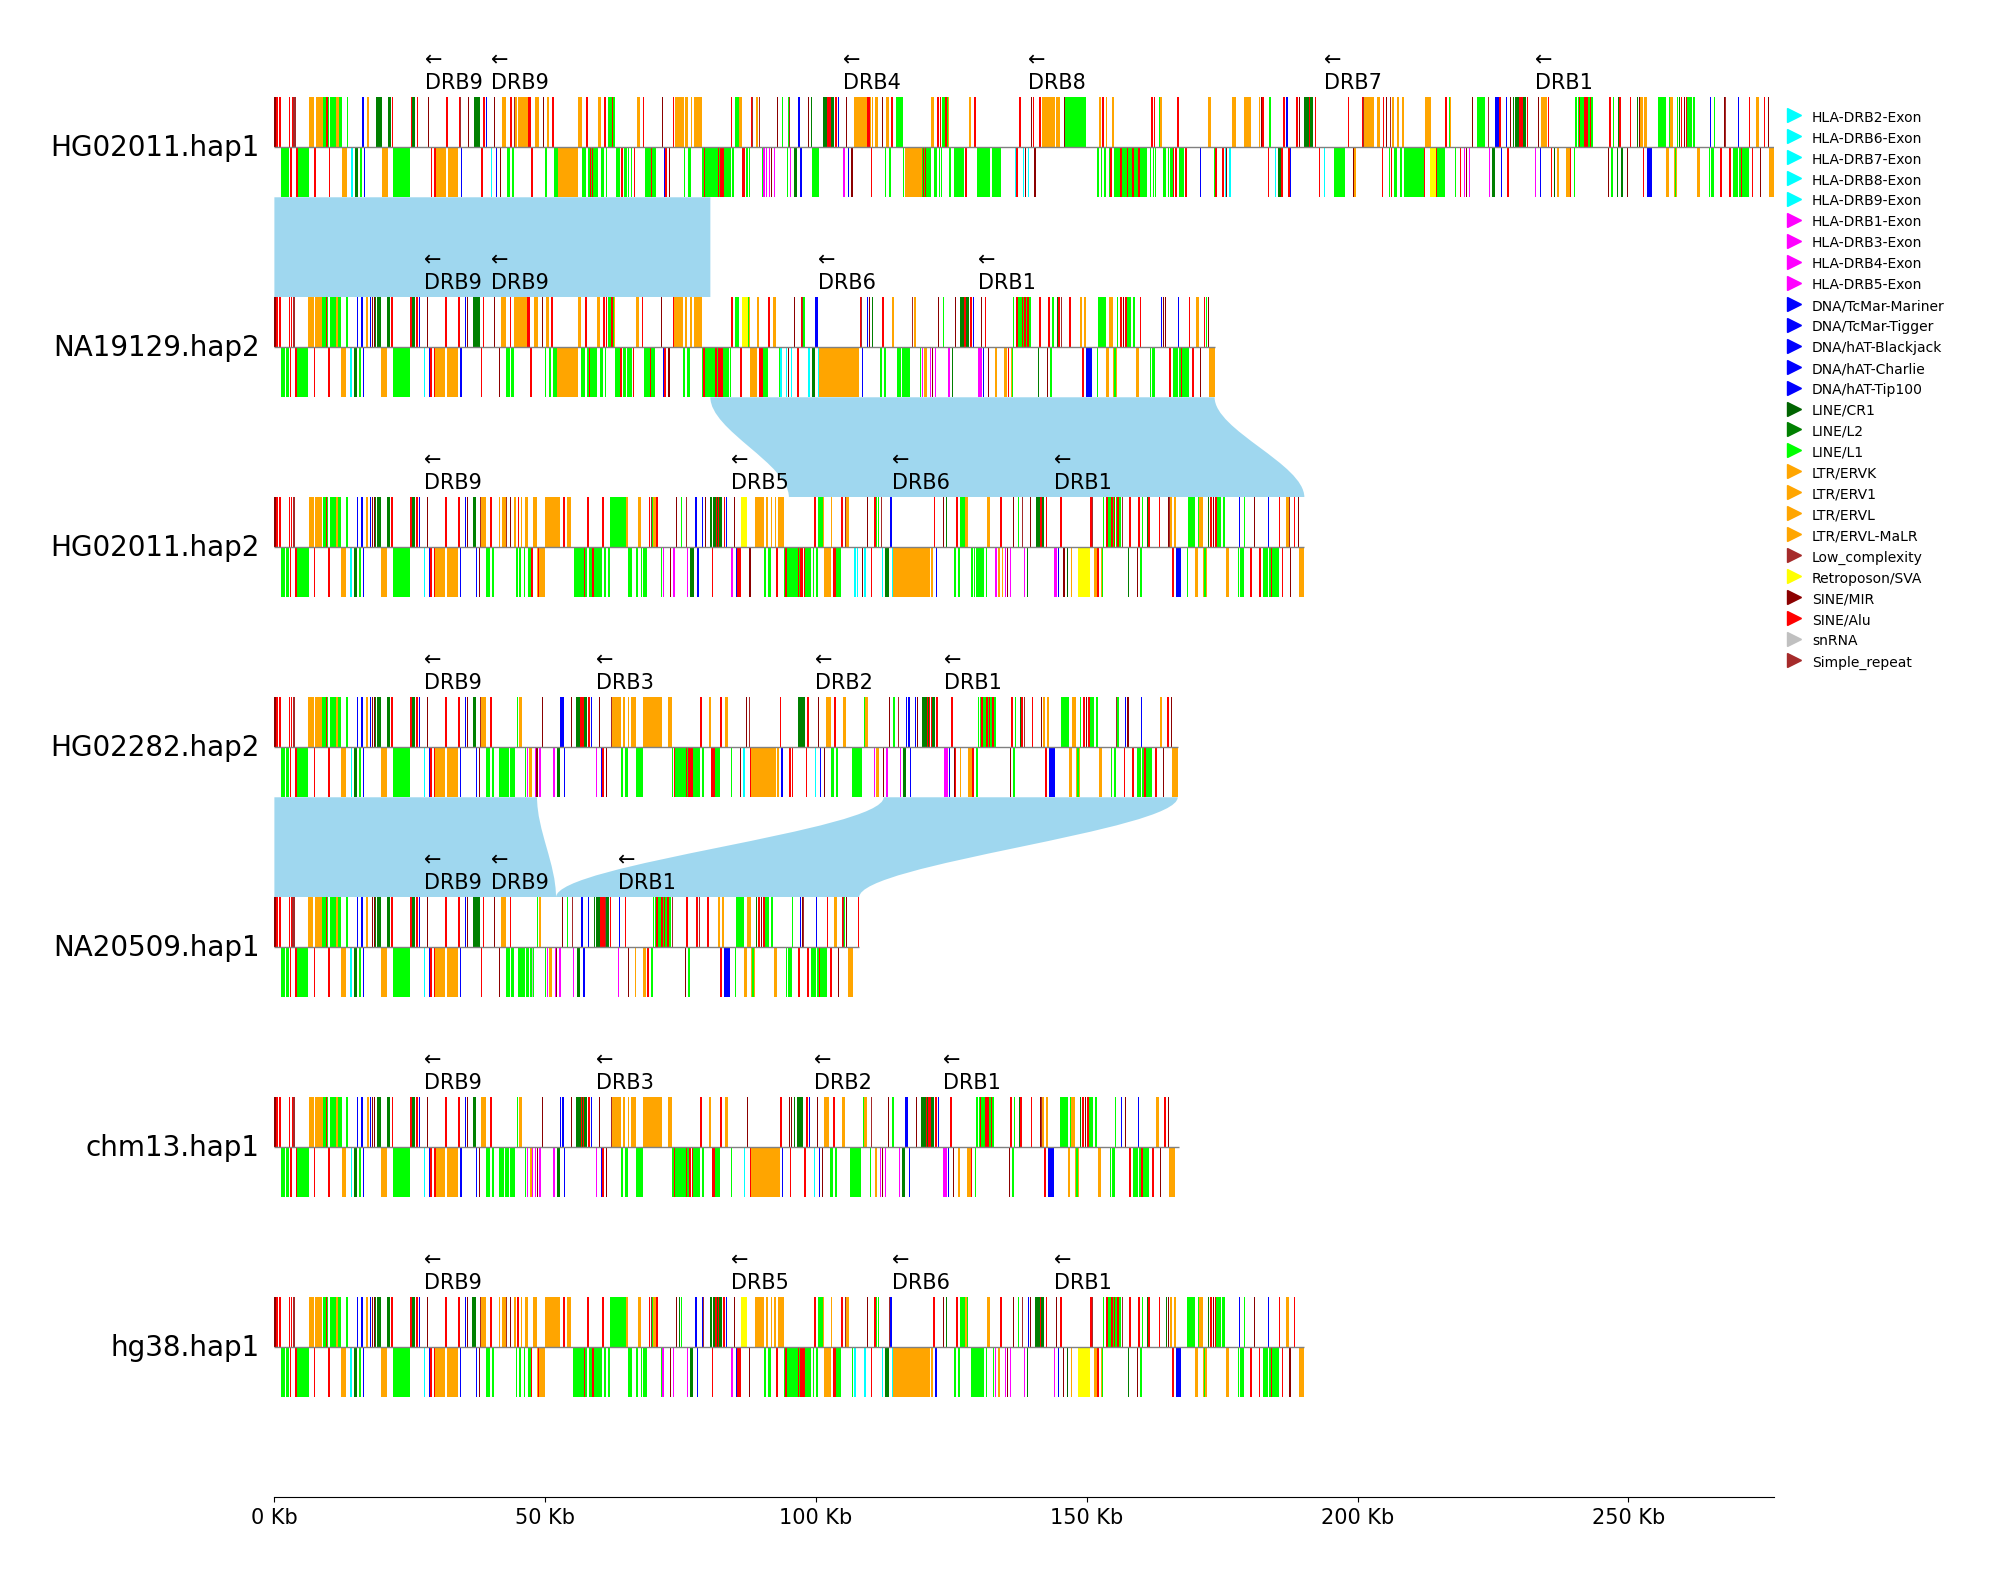

In [19]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

gv = GenomeViz(tick_style="axis")

for genome in myinterests:
    name, size, cds_list = genome_list[genome]["name"], genome_list[genome]["size"], genome_list[genome]["cds_list"]
    track = gv.add_feature_track(name, size)
    
    flag=1
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand, mylabel, color  = cds
        
        if 'HLA' in str(mylabel) and '_1' in str(mylabel):
            track.add_feature(start, end, strand, label='←\n'+str(mylabel.split("HLA-")[1].split("_")[0]),facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="left", labelha="left")
        else:
            track.add_feature(start, end, strand, facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="center", labelha="center")
                
# Add Legends 
handles =[]
for color in ColorDict.keys():
    if 'HLA' in str(color):
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=str(color)+"-Exon", ms=10, ls="none"))
    else:
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=color, ms=10, ls="none"))

gv.add_link(("HG02011.hap1", 1, 80500), ("NA19129.hap2", 1, 80500), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("NA19129.hap2", 80500,173604), ("HG02011.hap2", 95000, 190173), normal_color="skyblue", inverted_color="lime", curve=True)

gv.add_link(("HG02282.hap2", 1,48500), ("NA20509.hap1", 1, 52000), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("HG02282.hap2", 112500,166790), ("NA20509.hap1", 52000, 107979), normal_color="skyblue", inverted_color="lime", curve=True)


fig = gv.plotfig()
fig.subplots_adjust(wspace=0, hspace=1)
fig.legend(handles=handles, bbox_to_anchor=(1, 1))
fig.savefig("/home/mark/Desktop/DRB_combined_wPseudoGenes.pdf")
fig.savefig("/home/mark/Desktop/DRB_combined_wPseudoGenes.jpeg")

## Start Looking for Pseudogenes

In [15]:
import os
import ast
sampleCoordinates ={}
for file in os.listdir('/home/mark/Desktop/HLA/HengLi/Runs/'):
    sampleCoordinates[str(file.split(".")[0])+".hap"+str(file.split(".")[1])]={}
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/HengLi/Runs/'+str(file),sep='\t', comment='#', header=None)
    tempDF2 = tempDF[tempDF[2]=='gene'].copy()
    for row in tempDF2.index:
        geneName = ast.literal_eval(tempDF2.at[row,8].split("gene_name")[1].split(";")[0])
        coordinates = str(tempDF2.at[row,3])+"-"+str(tempDF2.at[row,4])
        sampleCoordinates[str(file.split(".")[0])+".hap"+str(file.split(".")[1])][coordinates]=geneName

In [16]:
sampleCoordinates['HG03683.hap1']

{'1565941-1569475': 'HLA-F',
 '1634432-1636334': 'HLA-V',
 '1642533-1645463': 'HLA-P',
 '1670123-1673260': 'HLA-G',
 '1723835-1727326': 'HLA-H',
 '1732238-1734723': 'HLA-T',
 '1762386-1765942': 'HLA-K',
 '1768523-1769108': 'HLA-U',
 '1776605-1780122': 'HLA-A',
 '1790480-1793420': 'HLA-W',
 '1840639-1844182': 'HLA-J',
 '2094776-2098459': 'HLA-L',
 '2186598-2187232': 'HLA-N',
 '2327068-2330889': 'HLA-E',
 '3106030-3110123': 'HLA-C',
 '3190196-3194280': 'HLA-B',
 '3218624-3219497': 'HLA-S',
 '3239916-3252067': 'MICA',
 '3335068-3346821': 'MICB',
 '3819031-3839654': 'C4AL',
 '3851769-3872392': 'C4BL',
 '3884507-3905130': 'C4BL',
 '4309042-4314752': 'HLA-DRA',
 '4405018-4420485': 'HLA-DRB4',
 '4534549-4550668': 'HLA-DRB1',
 '4600644-4607046': 'HLA-DQA1',
 '4620872-4627997': 'HLA-DQB1',
 '4706130-4711984': 'HLA-DQA2',
 '4721019-4728384': 'HLA-DQB2',
 '4776242-4781027': 'HLA-DOB',
 '4791996-4802609': 'TAP2',
 '4808540-4817809': 'TAP1',
 '4897923-4904662': 'HLA-DMB',
 '4911908-4916920': 'HLA-D

In [43]:
geneCountDF = pd.read_csv("/home/mark/Desktop/HLA/allGeneLocations/HLA_300Gene_locationDataframe.csv").set_index("Unnamed: 0")

In [45]:
geneCountDF.at['NA20509_hap1','HLA-DRB6']

"{'Count': 0, 'AdditionalCopies': {}, 'BestCopy': [], 'BestCopyDivergence': 0}"

In [ ]:
geneCountDF

In [169]:
#DRB7 = 5 exons
#DRB6 = 6 exons
#DRB2 = 4 exons
#DRB8 = 4 exons
#DRB9 = 2 exons
drbList =['HLA-DRB2', 'HLA-DRB6', 'HLA-DRB7', 'HLA-DRB8', 'HLA-DRB9']

In [170]:
pseudoDict={}

for row in geneCountDF.index:
    print(row)
    pseudoDict[row]={}
    haplotype = str(row).replace("_",'.')
    
    for drb in drbList:
        
        tempDict = ast.literal_eval(geneCountDF.at[row, drb])
        
        if tempDict['Count']>0:
            
            if tempDict['Count'] == 1:
                
                #Look at the best copy only
                tempList=[]
                for x in ast.literal_eval(geneCountDF.at[row, drb])['BestCopy']:
                    tempList.append(x)
                    
                tempDF = pd.DataFrame(data=tempList)
                tempDF[5] = tempDF[5].astype(int)
                tempDF[6] = tempDF[6].astype(int)
                
                di={0:'+', 1:'C'}
                tempDF2 = tempDF.sort_values(by=5).copy()
                tempDF2.replace({7: di}, inplace=True)
                
                tempList2 = []
                for rowy in tempDF2.index:
                    tempList2.append([rowx for rowx in tempDF2.loc[rowy]])
                
                count = len(tempDF2)
                start = min(tempDF2[5])
                end =  max(tempDF2[6])
                
                totalFlags=0
                
                for x,y in zip(tempDF2[5], tempDF2[6]):
                    print(x,y)
                    
                    flag =0
                    for gene in sampleCoordinates[haplotype]:
                        genestart= int(gene.split("-")[0])
                        geneend= int(gene.split("-")[1])
                        
                        if x > geneend or y < genestart:
                            continue
                        else:
                            if (x>=genestart and x<=geneend) or (y>=genestart and y<=geneend):
                                flag+=1
                            else:
                                continue
                        
                    if flag>0:
                        totalFlags+=1
                    else:
                        continue
                        
                
                pseudoDict[row][drb]={'Designation':'Best_Copy', 'Start':start, 'End':end, 'Flag_Percentage':totalFlags/count, 'Best_Copy_Exons':tempList2}
                
                
            else:
                
                #Look at the best copy First
                tempList=[]
                for x in ast.literal_eval(geneCountDF.at[row, drb])['BestCopy']:
                    tempList.append(x)
                    
                tempDF = pd.DataFrame(data=tempList)
                tempDF[5] = tempDF[5].astype(int)
                tempDF[6] = tempDF[6].astype(int)
                
                di={0:'+', 1:'C'}
                tempDF2 = tempDF.sort_values(by=5).copy()
                tempDF2.replace({7: di}, inplace=True)
                
                tempList2 = []
                for rowy in tempDF2.index:
                    tempList2.append([rowx for rowx in tempDF2.loc[rowy]])

                count = len(tempDF2)
                start = int(min(tempDF2[5]))
                end =  int(max(tempDF2[6]))
                
                totalFlags=0
                for x,y in zip(tempDF2[5], tempDF2[6]):
                    print(x,y)
                    
                    flag =0
                    for gene in sampleCoordinates[haplotype]:
                        genestart= int(gene.split("-")[0])
                        geneend= int(gene.split("-")[1])
                        
                        if x > geneend or y < genestart:
                            continue
                        else:
                            if (x>=genestart and x<=geneend) or (y>=genestart and y<=geneend):
                                flag+=1
                            else:
                                continue
                        
                    if flag>0:
                        totalFlags+=1
                    else:
                        continue
                        
                
                pseudoDict[row][drb]={'Designation':'Best_Copy', 'Start':start, 'End':end, 'Flag_Percentage':totalFlags/count, 'Best_Copy_Exons':tempList2}
                            
            
        else:
            pseudoDict[row][drb]='Not_Present'

HG02282_hap2
4392244 4392292
4392744 4392854
4393604 4393865
4394376 4394416
4406927 4407032
4321095 4321361
4334702 4334777
HG01573_hap2
4487240 4487290
4488039 4488149
4488852 4489135
4495289 4495330
4497230 4497493
4506323 4506422
4449304 4449343
4449938 4449986
4450751 4450861
4451560 4451841
4452360 4452406
4326656 4326922
4340237 4340311
4352548 4352623
4383541 4383615
HG00514_hap1
4313803 4314069
4327411 4327486
HG02018_hap1
4382514 4382562
4383014 4383124
4383847 4384108
4384619 4384659
4396833 4396938
4311365 4311631
4324972 4325047
HG03456_hap2
4445090 4445138
4445590 4445700
4446531 4446792
4447303 4447343
4459524 4459629
4373955 4374221
4387560 4387635
HG00731_hap1
4355395 4355443
4355895 4356005
4356836 4357097
4357608 4357648
4369828 4369933
4284245 4284511
4297851 4297926
HG02769_hap2
4361560 4361608
4362060 4362170
4362920 4363181
4363692 4363732
4376243 4376348
4290409 4290675
4304016 4304091
HG00733_hap1
4369494 4369542
4369994 4370104
4370881 4371142
4371653 4371693


4480349 4480396
4480829 4480936
4481663 4481944
4482457 4482496
4479686 4480045
4480349 4480397
4480829 4480939
4481663 4481944
4482457 4482504
4484891 4485161
4486791 4486977
4494058 4494236
4386786 4387052
4400389 4400464
NA20355_hap1
4422344 4422392
4422844 4422954
4423674 4423935
4424446 4424486
4436661 4436766
4347512 4347778
4361139 4361213
4373424 4373498
NA20847_hap2
4493339 4493389
4494138 4494248
4494951 4495234
4501388 4501429
4503329 4503592
4512407 4512506
4455400 4455439
4456034 4456082
4456847 4456957
4457656 4457937
4458456 4458502
4332741 4333007
4346322 4346396
4358638 4358713
4389633 4389707
NA21487_hap2
4460114 4460164
4460913 4461023
4461726 4462009
4468161 4468202
4470102 4470365
4479196 4479295
4422114 4422153
4422749 4422797
4423562 4423672
4424371 4424652
4425171 4425217
4299128 4299394
4312709 4312783
4325020 4325095
4356014 4356088
NA18989_hap2
4424878 4424925
4425377 4425487
4426188 4426469
4434258 4434357
4397417 4397776
4398080 4398128
4398560 4398670
4399

In [172]:
pseudoDict['HG02554_hap1']

{'HLA-DRB2': {'Designation': 'Best_Copy',
  'Start': 4415763,
  'End': 4417910,
  'Flag_Percentage': 0.0,
  'Best_Copy_Exons': [[100438,
    6.2,
    0.0,
    0.0,
    'HG02554.hap1',
    4415763,
    4415810,
    'C',
    'HLA-DRB2-201_UP_IN-25_EXON_4',
    0,
    49,
    2,
    'HLA-DRB2-201',
    0.9591836734693876,
    'Not Gene',
    'HLA-DRB2'],
   [100439,
    3.7,
    0.0,
    0.0,
    'HG02554.hap1',
    4416243,
    4416350,
    'C',
    'HLA-DRB2-201_UP_EXON_3',
    0,
    111,
    4,
    'HLA-DRB2-201',
    0.963963963963964,
    'Gene',
    'HLA-DRB2'],
   [100440,
    5.4,
    0.0,
    7.6,
    'HG02554.hap1',
    4417077,
    4417358,
    'C',
    'HLA-DRB2-201_UP_EXON_2',
    0,
    262,
    1,
    'HLA-DRB2-201',
    0.9961832061068704,
    'Not Gene',
    'HLA-DRB2'],
   [100441,
    12.5,
    0.0,
    0.0,
    'HG02554.hap1',
    4417871,
    4417910,
    'C',
    'HLA-DRB2-201_UP_EXON_2',
    1,
    261,
    222,
    'HLA-DRB2-201',
    0.148854961832061,
    'Not G

In [175]:
#Run Twice to fill out the heatmap
immunoPseudo=[]
mp = []
for haplotype in pseudoDict.keys():
    tempList=[]
    for drb in pseudoDict[haplotype]:
        if pseudoDict[haplotype][drb]=='Not_Present':
            continue
        else:
            if float(pseudoDict[haplotype][drb]['Flag_Percentage'])==0.0:
                tempList.append(drb)
            else:
                continue
    
    hap = haplotype.replace("_",".")
    tempDF = DRB_DF[DRB_DF[5]==hap].copy()
    mp.append('_'.join(tempList))
    newList =[ast.literal_eval(x) for x in set(tempDF[tempDF[10].str.contains('HLA', regex=True)][18])]
    immunoPseudo.append('_'.join(newList))
    heatmap.at['_'.join(tempList), '_'.join(newList)]+=1
    if '_'.join(newList) == 'HLA-DRB1_HLA-DRB5' and '_'.join(tempList) == 'HLA-DRB6_HLA-DRB9':
        print(haplotype)
    else:
        pass
    print(haplotype, 'Missing Pseudogene: '+str(tempList), '\n','ImmunoAnnot: '+str(set(tempDF[tempDF[10].str.contains('HLA', regex=True)][18])),'\n')

HG02282_hap2 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG01573_hap2 Missing Pseudogene: ['HLA-DRB7', 'HLA-DRB8', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB4"'} 

HG00514_hap1 Missing Pseudogene: ['HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"'} 

HG02018_hap1 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG03456_hap2 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG00731_hap1 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG02769_hap2 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG00733_hap1 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG03452_hap2 Missing Pseudogene: ['HLA-DRB2', 'HLA-DRB9'] 
 ImmunoAnnot: {' "HLA-DRB1"', ' "HLA-DRB3"'} 

HG01457_hap2 Missing Pseudogene: ['HLA-DRB7', 'HLA-DRB8', 'HL

In [174]:
heatmap = pd.DataFrame(index=[x for x in set(mp)], columns=[y for y in set(immunoPseudo)]).fillna(0)
heatmap

,HLA-DRB1_HLA-DRB3,HLA-DRB1_HLA-DRB4,HLA-DRB1_HLA-DRB5,HLA-DRB1
HLA-DRB2_HLA-DRB6_HLA-DRB9,0,0,0,0
HLA-DRB7_HLA-DRB8_HLA-DRB9,0,0,0,0
HLA-DRB6_HLA-DRB9,0,0,0,0
HLA-DRB2_HLA-DRB9,0,0,0,0
HLA-DRB9,0,0,0,0


<Axes: >

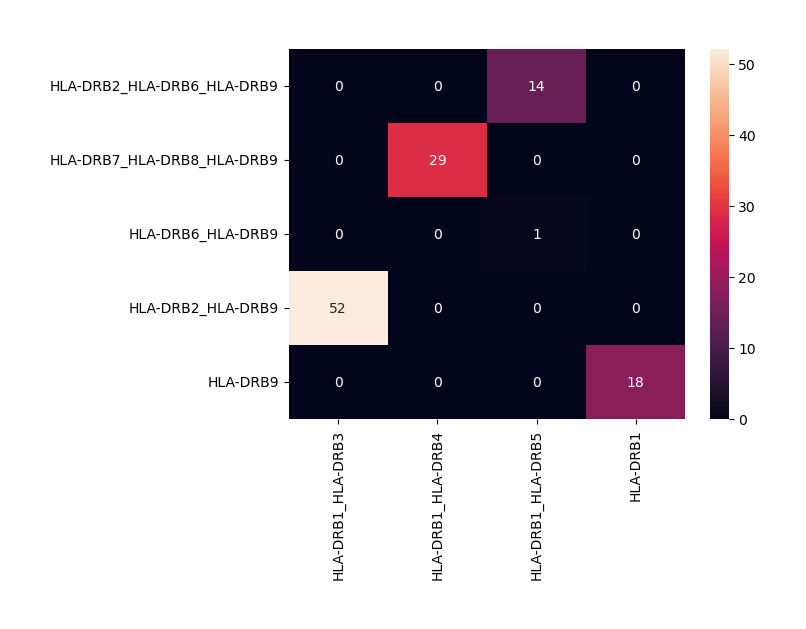

In [176]:
import seaborn as sns

sns.heatmap(data=heatmap, annot=True)

In [181]:
pseudoDict

{'HG02282_hap2': {'HLA-DRB2': {'Designation': 'Best_Copy',
   'Start': 4392244,
   'End': 4407032,
   'Flag_Percentage': 0.0,
   'Best_Copy_Exons': [[100729,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4392244,
     4392292,
     'C',
     'HLA-DRB2-201_UP_IN-25_EXON_4',
     0,
     49,
     1,
     'HLA-DRB2-201',
     0.979591836734694,
     'Gene',
     'HLA-DRB2'],
    [100730,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4392744,
     4392854,
     'C',
     'HLA-DRB2-201_UP_EXON_3',
     0,
     111,
     1,
     'HLA-DRB2-201',
     0.990990990990991,
     'Gene',
     'HLA-DRB2'],
    [100731,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4393604,
     4393865,
     'C',
     'HLA-DRB2-201_UP_EXON_2',
     0,
     262,
     1,
     'HLA-DRB2-201',
     0.9961832061068704,
     'Gene',
     'HLA-DRB2'],
    [100732,
     14.6,
     0.0,
     0.0,
     'HG02282.hap2',
     4394376,
     4394416,
     'C',
     'HLA-DRB2-201_UP_EXON_2',
     0,
  

In [270]:
pseudoDict['NA18534_hap1']['HLA-DRB9']

{'Designation': 'Best_Copy',
 'Start': 4331442,
 'End': 4388403,
 'Flag_Percentage': 0.0,
 'Best_Copy_Exons': [[31990,
   0.8,
   0.0,
   0.0,
   'NA18534.hap1',
   4331442,
   4331708,
   'C',
   'HLA-DRB9-201_UP_EXON_2',
   0,
   267,
   1,
   'HLA-DRB9-201',
   0.99625468164794,
   'Gene',
   'HLA-DRB9'],
  [31991,
   2.7,
   0.0,
   0.0,
   'NA18534.hap1',
   4345023,
   4345097,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Gene',
   'HLA-DRB9'],
  [31992,
   2.6,
   0.0,
   0.0,
   'NA18534.hap1',
   4357334,
   4357409,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   0,
   76,
   1,
   'HLA-DRB9-201',
   0.986842105263158,
   'Gene',
   'HLA-DRB9'],
  [31993,
   8.0,
   0.0,
   0.0,
   'NA18534.hap1',
   4388329,
   4388403,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Not Gene',
   'HLA-DRB9']]}

In [186]:
PseudoList=[]
for haplotype in pseudoDict.keys():
    for drb in pseudoDict[haplotype]:
        if pseudoDict[haplotype][drb] == 'Not_Present':
            continue
        else:
            if float(pseudoDict[haplotype][drb]['Flag_Percentage']) == 0.0:
                for exon in pseudoDict[haplotype][drb]['Best_Copy_Exons']:
                    PseudoList.append(exon)
            else:
                continue

In [188]:
pDF = pd.DataFrame(data=PseudoList)

In [190]:
#pDF.to_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM.csv')